In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('raw.csv', sep=',',engine='python')
df = data
len(df)

5776

In [21]:
sub = df[['BLCODE','SUB','ASH']]
sub_new = sub.dropna()
print(len(sub_new))
np.shape(np.unique(np.array(sub_new)))

5630


(1496,)

In [3]:
#data_new = df.dropna(subset=['ASH','INSUL','TAAV','RH','dayav_ta','dayav_rh','MET','TRAV','VELAV'])
data_new = df.dropna(subset=['ASH','INSUL','TAAV','RH'])
print(len(data_new))
# get features and thermal sensation
y = data_new['ASH']
#x = data_new[['INSUL','TAAV','RH','dayav_ta','dayav_rh','MET']]
x = data_new[['INSUL','TAAV','RH']]
y = np.round(y)
#from sklearn import preprocessing
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(y)

5611


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'Prediction of thermal sensation')

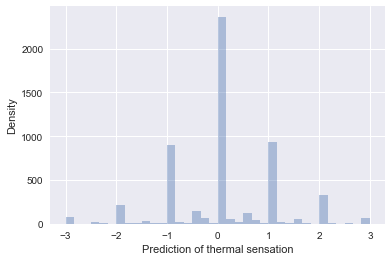

In [161]:
comfort = df.iloc[np.where(df['ASH']==0)]
temp = comfort['TAAV']
temp = data_new['ASH']
sns.distplot(temp,kde=False)
plt.ylabel('Density')
plt.xlabel('Prediction of thermal sensation')

In [5]:
scaler = StandardScaler()
normx = scaler.fit_transform(x)
# normalized 
X_train, X_test, Y_train, y_test = train_test_split(
     normx, y, test_size=0.06, random_state=None)
# original 
# X_train, X_test, Y_train, y_test = train_test_split(
#     x, y, test_size=0.1, random_state=None)
len(X_test)

337

# undersample

In [6]:
rus = RandomUnderSampler(random_state=0)
x_train, y_train = rus.fit_sample(X_train, Y_train)
for i in range(7):
    print(np.shape(np.where(y_train==(i-3))))

(1, 67)
(1, 67)
(1, 67)
(1, 67)
(1, 67)
(1, 67)
(1, 67)


# oversampling

In [58]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

In [59]:
#ros = RandomOverSampler(random_state=0)
#x_train, y_train = ros.fit_resample(X_train, y_train)
x_train, y_train = SMOTE().fit_resample(X_train, Y_train)
for i in range(7):
    print(np.shape(np.where(y_train==(i-3))))

(1, 1407)
(1, 1407)
(1, 1407)
(1, 1407)
(1, 1407)
(1, 1407)
(1, 1407)


# train 

In [7]:
import sklearn.preprocessing, sklearn.decomposition,sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import datasets, svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_pandas import DataFrameMapper
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# without sampling
x_train = X_train
y_train = Y_train

In [9]:
# evaluation
clf1 = svm.SVC(kernel='rbf',gamma=0.1, C=1)
# SVM
print(cross_val_score(clf1,x_train,y_train,cv=5))

[0.49432892 0.49478673 0.49525617 0.49525617 0.4957265 ]


In [10]:
clf2 = RandomForestClassifier(n_estimators=50, max_depth = 5)
from sklearn import tree
#clf = tree.DecisionTreeClassifier()
#clf2 = tree.DecisionTreeClassifier(max_depth=5)
# RF
print(cross_val_score(clf2,x_train,y_train,cv=5))

[0.4905482  0.492891   0.4914611  0.4971537  0.49477683]


In [11]:
# evaluation
# KNN
clf3 = KNeighborsClassifier(n_neighbors=100)
print(cross_val_score(clf3,x_train,y_train,cv=5))

[0.49149338 0.49383886 0.48956357 0.5        0.4957265 ]


In [45]:
# Ensemble
clf4 = VotingClassifier(estimators = [('knn', clf3), ('rf', clf2), ('svc',clf1)],voting='hard')
print(cross_val_score(clf4,x_train,y_train,cv=5))

[0.47554806 0.47627119 0.47789116 0.47789116 0.47789116]


# test

In [12]:
# testing
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# test with random forest
clf2 = RandomForestClassifier(n_estimators=50, max_depth = 5)
clf2.fit(x_train,y_train)
predict = clf2.predict(X_test)
f1=f1_score(y_test, predict, average='weighted') 
r1=recall_score(y_test, predict, average='weighted') 
p1=precision_score(y_test,predict,average='weighted')
a1=accuracy_score(y_test,predict)
matrix_sensation2 = confusion_matrix(y_test, predict)
print(f1)
print(r1)
print(p1)
print(a1)

0.3011959356173006
0.4688427299703264
0.22186307757524373
0.4688427299703264


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [204]:
matrix_sensation2

array([[  1,   1,   1,   5,   1,   1,   1],
       [  1,   1,   2,  17,   1,   1,   1],
       [  1,   1,   1,  66,   1,   1,   1],
       [  1,   1,   1, 165,   1,   1,   1],
       [  1,   1,   1,  57,   2,   1,   1],
       [  1,   1,   1,  29,   1,   1,   1],
       [  1,   1,   1,   3,   1,   1,   1]])

In [193]:
# calculate accuracy
count = np.where(predict==y_test)
acc = np.shape(count)[1]/len(y_test)
acc

0.4836795252225519

In [14]:
# test with svm
clf1.fit(x_train,y_train)
predict = clf1.predict(X_test)
f1=f1_score(y_test, predict, average='weighted') 
r1=recall_score(y_test, predict, average='weighted') 
p1=precision_score(y_test,predict,average='weighted')
matrix_sensation1 = confusion_matrix(y_test, predict)
print(f1)
print(r1)
print(p1)

0.3024911457834785
0.47181008902077154
0.22260476010178837


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [177]:
# calculate accuracy
count = np.where(predict==y_test)
acc = np.shape(count)[1]/len(y_test)
acc

0.486646884272997

In [15]:
# test with knn
clf3.fit(x_train,y_train)
predict = clf3.predict(X_test)
f1=f1_score(y_test, predict, average='weighted') 
r1=recall_score(y_test, predict, average='weighted') 
p1=precision_score(y_test,predict,average='weighted')
matrix_sensation3 = confusion_matrix(y_test, predict)
print(f1)
print(r1)
print(p1)

0.31438586995855766
0.47477744807121663
0.35442564225947015


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
# calculate accuracy
count = np.where(predict==y_test)
acc = np.shape(count)[1]/len(y_test)
acc

0.47865853658536583

In [25]:
# test with ensemble
clf4.fit(x_train,y_train)
predict = clf4.predict(X_test)
f1=f1_score(y_test, predict, average='weighted') 
r1=recall_score(y_test, predict, average='weighted') 
p1=precision_score(y_test,predict,average='weighted')
matrix_sensation4 = confusion_matrix(y_test, predict)
print(f1)
print(r1)
print(p1)
clf4

0.2992605170033483
0.4603658536585366
0.3013211382113821


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, ma...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [20]:
import pickle
#filename = 'rf_model.sav'
filename = 'pred_controller/ensemble_model.sav'
# python2
#pickle.dump(clf,open(filename,'wb'),protocol=2)
# python3
pickle.dump(clf4,open(filename,'wb'))
load_model = pickle.load(open(filename,'rb'))
#test = np.array([[0.784,15,61,27.55,81.55,1.00]])
test = np.array([[0.784,15,30]])
#pred = load_model.predict(normx[0].reshape(1,-1))
pred = load_model.predict(test)
pred

array([0.])

In [179]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


337

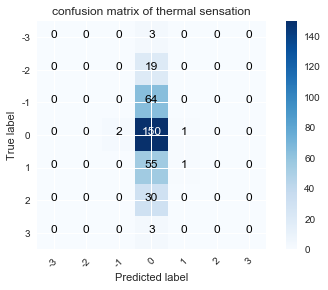

In [182]:
class_names = [-3,-2,-1,0,1,2,3]
plot_confusion_matrix(matrix_sensation4,classes=class_names,
                      title='confusion matrix of thermal sensation')
np.sum(matrix_sensation3)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(x, encoded)

In [ ]:
print(cross_val_score(clf2,X_train_res,y_train_res,cv=5))

In [ ]:
print(x.iloc[0])
print(normx[0])

In [ ]:
    temps = np.arange(10,40,0.01)
    states=np.zeros((len(temps),3))
    states[:,0] = 1
    states[:,2] = 60
    states[:,1] = temps

In [ ]:
state=states[0]
states.tolist().index(state.tolist())

In [ ]:
load_model.predict(state.reshape(1,-1))